Créé par Antoine Laverdière-Allaire

# Project

## The Global Environmental Impact (CO2 Emissions) of Food Production Between 2000-2020

As part of this programming project, I explored the impact of agricultural activities on CO2 emissions using a database detailing emissions attributed to various agriculture-related sources, as well as other environmental factors, for different countries and years. This database includes information on emissions due to savanna and forest fires, crop residues, rice cultivation, drained organic soils, pesticide manufacturing, and food transport, among other emission sources. Additionally, it provides demographic and climatic data such as rural and urban populations and temperature variations, offering a comprehensive overview to analyze the global environmental impact of food production.

## Exploited database

Let's start by importing the database to analyze its contents. Read the file and store the data in a DataFrame to proceed with answering the questions.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data from the file
with open("Agrofood_co2_emission.csv", "r", encoding="utf-8") as file:
    lines = file.readlines() 

# Store the data in a DataFrame
df_foodco2 = pd.read_csv("Agrofood_co2_emission.csv", on_bad_lines='skip')

df_foodco2

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.0000,0.0,11.807483,63.1152,-2388.8030,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.1600,0.0,11.712073,61.2125,-2388.8030,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.0000,0.0,11.712073,53.3170,-2388.8030,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.0000,0.0,11.712073,54.3617,-2388.8030,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.6000,0.0,11.712073,53.9874,-2388.8030,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6805,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,...,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6806,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,...,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6807,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,...,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6808,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,...,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


### Note
#### Precision Decision
Since there are over 6,000 observations from 1990 in our chosen database, I decided to focus on the last 20 years.

In [5]:
# Calculate the number of observations made between 2000 and 2020
df_2000_2020 = df_foodco2[(df_foodco2['Year'] >= 2000) & (df_foodco2['Year'] <= 2020)]
df_2000_2020

number_of_observations_len = len(df_2000_2020)
print(f"Number of observations between 2000 and 2020: {number_of_observations_len}")

Number of observations between 2000 and 2020: 4655


There is a total of 4,760 rows of observations, which complies with the project guidelines.

### Note
As part of this analysis, it is necessary to create a variable that accounts for the sum of CO2 emissions (in corresponding units) for agricultural activities by year and region.

I have thus created the column 'Total Agricultural Activities', which will be used to build a robust analysis.

In [6]:
# Selection of user-specified columns for the calculation of "Total Agricultural Activities"
columns_to_sum = [
    "Crop Residues", "Rice Cultivation", 
    "Drained organic soils (CO2)", "Pesticides Manufacturing", "Food Transport",
    "On-farm energy use", "Food Packaging", "Agrifood Systems Waste Disposal", "Food Processing",
    "Fertilizers Manufacturing", "IPPU", "Manure applied to Soils", "Manure left on Pasture",
    "Manure Management"]

# Validation of the existence of all required columns
missing_columns = [col for col in columns_to_sum if col not in df_2000_2020.columns]

if not missing_columns:
    # Creation of a copy of the DataFrame to avoid the SettingWithCopyWarning
    df_2000_2020 = df_2000_2020.copy()
    
    # Calculation of the sum of the specified columns for each row to create the new variablee
    df_2000_2020['Total Agricultural Activities'] = df_2000_2020[columns_to_sum].sum(axis=1)
else:
    missing_columns

# Display the updated DataFrame
df_2000_2020

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C,Total Agricultural Activities
10,Afghanistan,2000,22.7810,0.7111,168.8070,509.6000,0.0,11.712073,38.5560,-2388.8030,...,0.0,0.0,NaN,15657474.0,4436282.0,9815442.0,9727541.0,3113.528415,0.975667,5296.829215
11,Afghanistan,2001,0.2219,0.0000,170.9884,474.3200,0.0,11.712073,39.1935,121.9016,...,0.0,0.0,NaN,16318324.0,4648139.0,9895467.0,9793166.0,5038.533968,1.408917,4704.247968
12,Afghanistan,2002,9.0562,0.0000,266.1975,529.2000,0.0,11.712073,37.5246,121.9016,...,0.0,0.0,NaN,17086910.0,4893013.0,10562202.0,10438055.0,6035.816468,1.084167,5660.178268
13,Afghanistan,2003,55.8052,0.0000,324.2195,568.4000,0.0,11.712073,60.7014,121.9016,...,0.0,0.0,NaN,17909063.0,5155788.0,11397483.0,11247647.0,6449.089231,0.679333,5996.530731
14,Afghanistan,2004,11.9759,0.0000,266.9995,764.4000,0.0,11.712073,48.7587,121.9016,...,0.0,0.0,NaN,18692107.0,5426872.0,11862726.0,11690825.0,6734.998231,1.398833,6296.302731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6805,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,...,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250,8782.981147
6806,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,...,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500,7481.002553
6807,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,...,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333,7675.499005
6808,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,...,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667,8941.245599


## Part 1 : Introduction Questions to the analysis

### Question 1.1 : What is the overall trend of CO2 emissions between 2000 and 2020?

c:\Users\Utilisateur 1\Documents\Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Utilisateur 1\Documents\Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


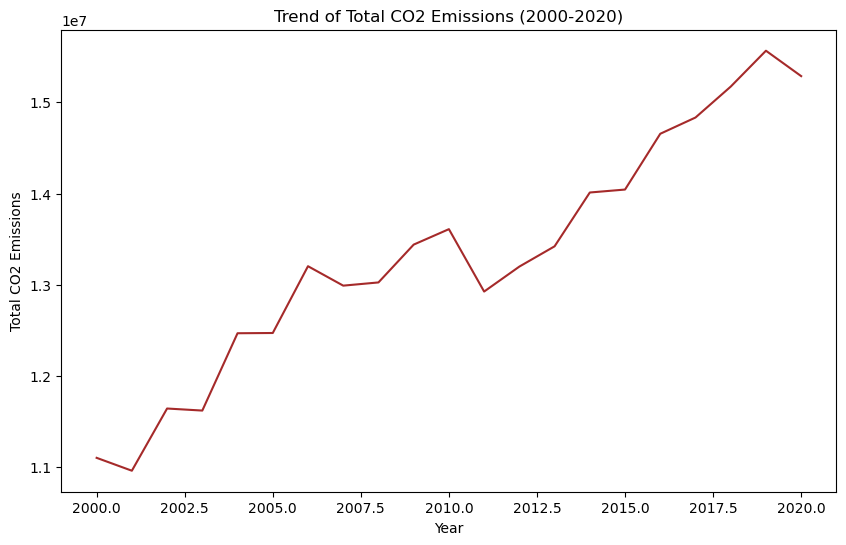

In [7]:
# Aggregation of total CO2 emissions by year
emissions_per_year = df_2000_2020.groupby("Year")["total_emission"].sum().reset_index()

# Visualization of the trend in total CO2 emissions
plt.figure(figsize=(10, 6))
sns.lineplot(data=emissions_per_year, x="Year", y="total_emission",color = 'brown')
plt.title("Trend of Total CO2 Emissions (2000-2020)")
plt.xlabel("Year")
plt.ylabel("Total CO2 Emissions")
plt.show()

The analysis of the CO2 emissions trend between 2000 and 2020 clearly indicates the urgency of intensifying efforts to reduce emissions in order to combat climate change. An upward trend necessitates immediate action, while stabilization or reduction signals progress towards climate goals. These results underscore the critical importance of continuing innovations and sustainable policies.

c:\Users\Utilisateur 1\Documents\Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Utilisateur 1\Documents\Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


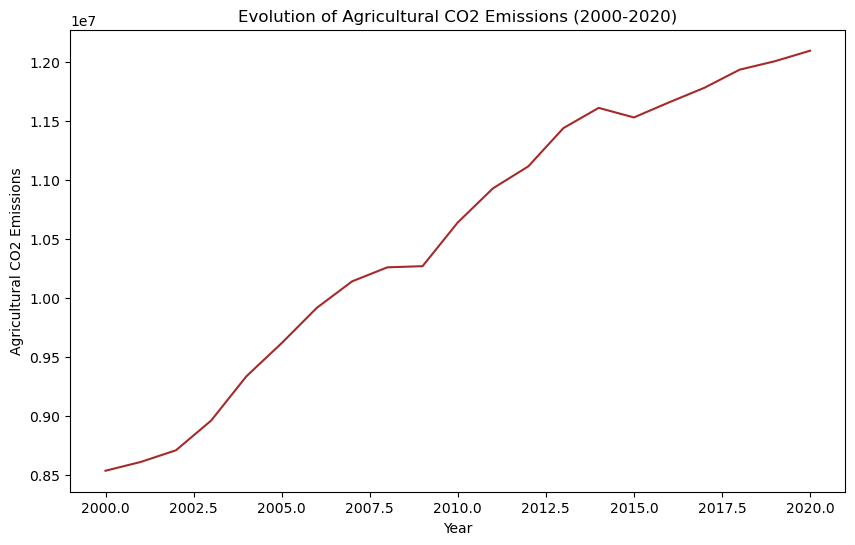

In [10]:
# Aggregate agricultural emissions by year
agricultural_emissions_per_year = df_2000_2020.groupby('Year')['Total Agricultural Activities'].sum().reset_index()

# Plot the graph of agricultural emissions over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=agricultural_emissions_per_year, x="Year", y="Total Agricultural Activities",color = 'brown')
plt.title("Evolution of Agricultural CO2 Emissions (2000-2020)")
plt.xlabel("Year")
plt.ylabel("Agricultural CO2 Emissions")
plt.show()

The analysis of agricultural CO2 emissions trends from 2000 to 2020 reveals the effectiveness of agricultural practices and policies in addressing climate change. An increase in emissions would highlight the need for more sustainable agricultural methods, while a decreasing trend would indicate progress toward less impactful agriculture. This evolution is crucial for guiding future efforts to reduce emissions in the sector.

### Question 1.2 : Which agricultural products have the highest impact in terms of CO2 emissions?

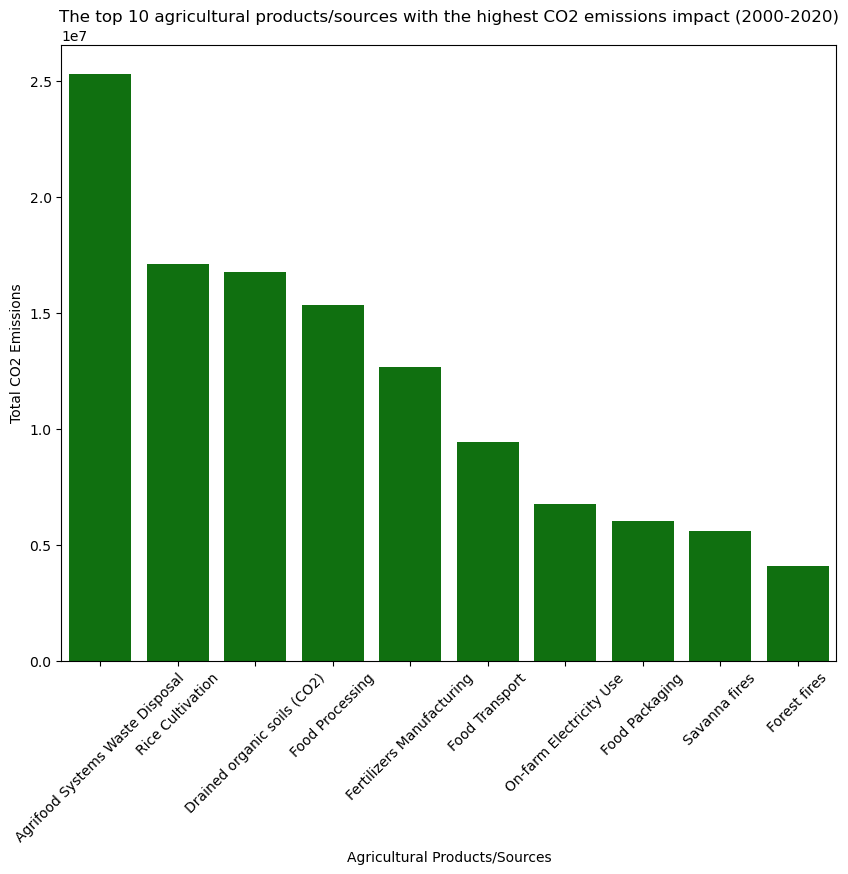

In [11]:
# Definition of agriculture-specific columns/sources of emissions
agricultural_sources = ["Crop Residues", "Rice Cultivation", "Forest fires", 
                     "Savanna fires", "Drained organic soils (CO2)", "Pesticides Manufacturing", 
                     "Food Transport", "On-farm Electricity Use", "Food Packaging", "Agrifood Systems Waste Disposal", 
                     "Food Processing", "Fertilizers Manufacturing"]

# Aggregation of emissions by source to identify the most impactful ones
emissions_per_source = df_2000_2020[agricultural_sources].sum().sort_values(ascending=False)

# Selection of the top 10 most impactful sources
top10_emissions_sources = emissions_per_source.head(10)

# Conversion of the series to a DataFrame for visualization
top10_sources_df = top10_emissions_sources = emissions_per_source.head(10).reset_index()
top10_sources_df.columns = ['Source', 'Total CO2 Emissions']

# Creation of the graph
plt.figure(figsize=(10, 8))
sns.barplot(data=top10_sources_df, x='Source', y='Total CO2 Emissions', color = 'green')
plt.title("The top 10 agricultural products/sources with the highest CO2 emissions impact (2000-2020)")
plt.xlabel("Agricultural Products/Sources")
plt.ylabel("Total CO2 Emissions")

# Adjustment of the x-axis labels
plt.xticks(rotation=45)
plt.show()

The graph clearly illustrates that, among the products and practices analyzed between 2000 and 2020, waste management in agro-food systems, rice cultivation, and food processing stand out as the most significant sources of CO2 emissions in the agricultural sector. The disproportionate impact of these sources suggests that targeted efforts to improve waste management, optimize rice cultivation practices, and enhance the efficiency of food processing could significantly contribute to reducing overall emissions in this sector. This analysis helps identify key areas within agricultural and food activities that have a substantial impact on CO2 emissions, highlighting potential areas for sustainability initiatives and carbon footprint reduction.

### Question 1.3 : Which country has the highest CO2 emissions related to agriculture between 2000 and 2022?

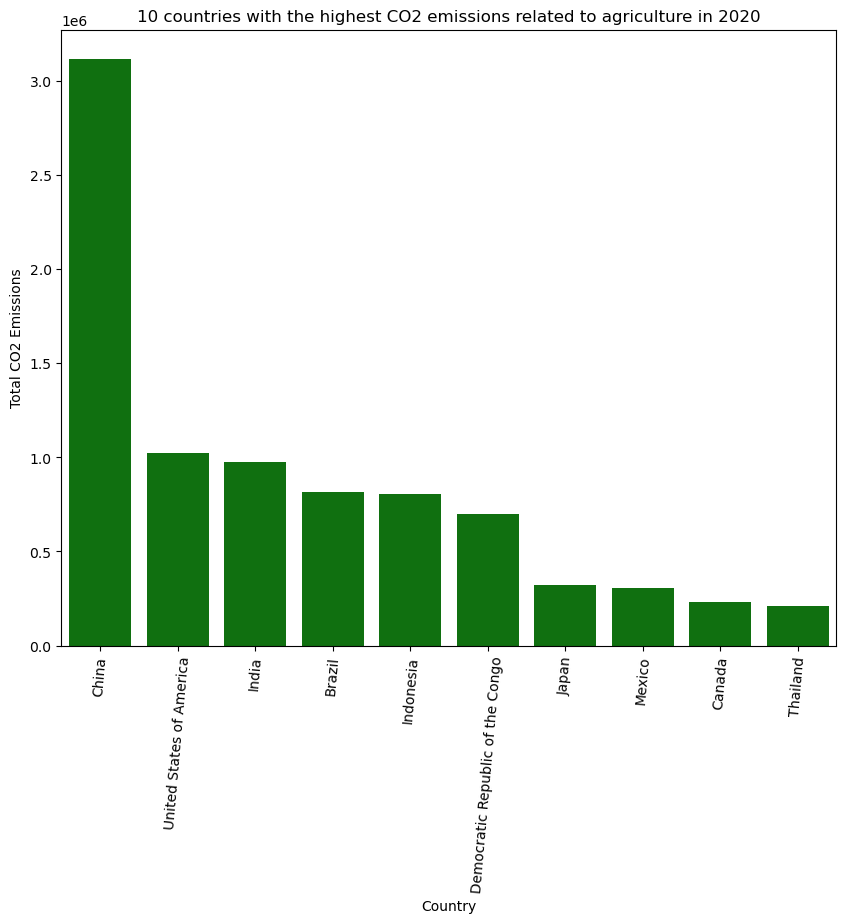

In [13]:
# Aggregation of total CO2 emissions by country for the most recent year within the 2000-2020 range
most_recent_year = df_2000_2020['Year'].max()
recent_emissions_by_country = df_2000_2020[df_2000_2020['Year'] == most_recent_year].groupby('Area')['total_emission'].sum().sort_values(ascending=False)

# Sélection des 10 pays avec les émissions les plus élevées pour l'année la plus récente
top10_recent_emissions_by_country = recent_emissions_by_country.head(10)

# Convertir la série en DataFrame
top10_recent_emissions_by_country_df = top10_recent_emissions_by_country.reset_index()

# Création du graphique avec les axes inversés
plt.figure(figsize=(10,8))
sns.barplot(data=top10_recent_emissions_by_country_df , x="Area", y="total_emission", color = 'green')
plt.title(f"10 countries with the highest CO2 emissions related to agriculture in {most_recent_year}")
plt.xlabel("Country")
plt.ylabel("Total CO2 Emissions")

#ajuster l'axe des x
plt.xticks(rotation=85)
plt.show()

The graph clearly shows that China and Thailand lead by a wide margin as the top emitters of CO2 related to agriculture in 2020, followed by the United States and India. This indicates that these countries could significantly benefit from improved agricultural practices and more sustainable resource management. The distribution of emissions underscores the importance of addressing agricultural and environmental policies at the national level while considering the specifics and scales of each country's agricultural economy to effectively reduce their contribution to global greenhouse gas emissions.

### Question 1.4 : What is the Relationship Between CO2 Emissions from Agricultural Practices and Average Temperature Variations?

#### **Choice of Correlation Method**

For the correlation analysis in our project, I consulted ChatGPT for a preliminary assessment of the distribution of our data. ChatGPT analyzed the data types according to normal distribution to determine which correlation measure would be most appropriate.

**Why Spearman's Correlation?**

Non-Normality of Data: Our continuous variables do not follow a normal distribution, making Pearson’s correlation less reliable.

Robustness to Outliers: Spearman's correlation is non-parametric and less sensitive to outliers, which is crucial given the presence of significant outliers in our dataset.

Non-Linear Relationships: This method measures monotonic associations, which is ideal for potentially non-linear relationships between variables such as CO2 emissions and average temperature.

**Conclusion**

Considering these aspects, we use Spearman's correlation to ensure a robust and reliable analysis of the relationships between the variables in our study.

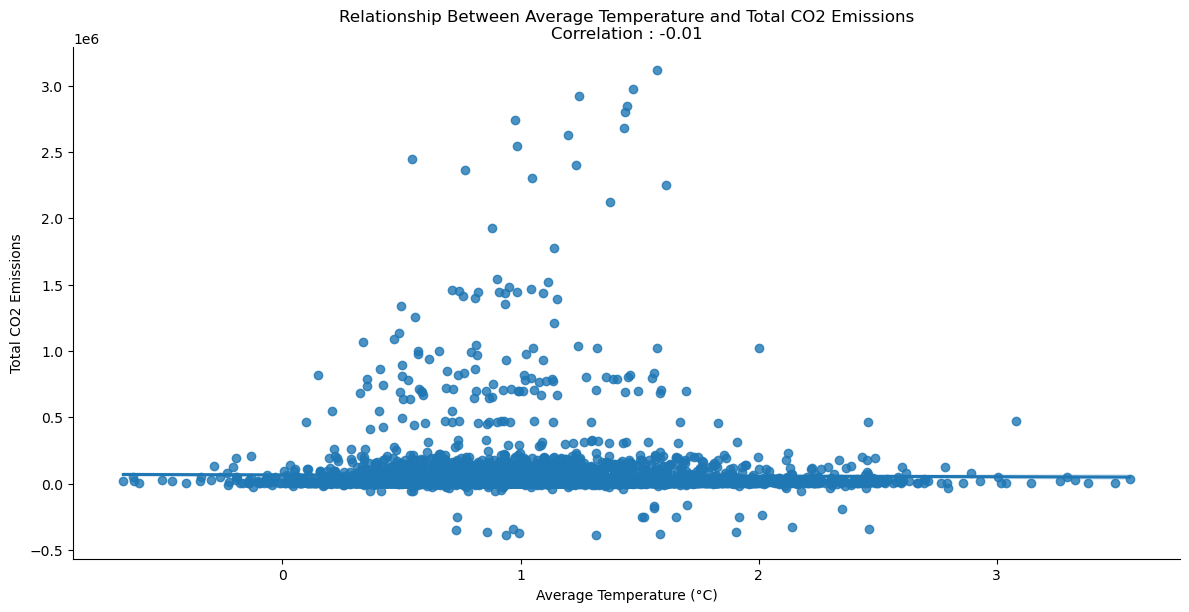

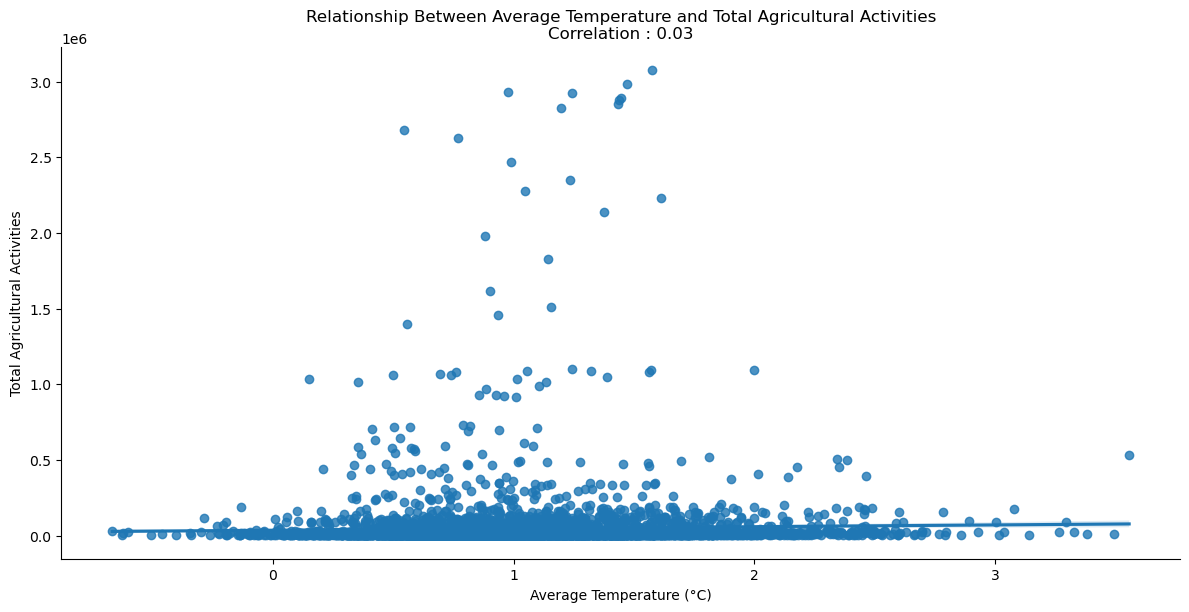

Correlation Between Average Temperature and Total CO2 Emissions : -0.01
The variables have a weak or nonexistent correlation.
The correlation is negative.
Correlation Between Average Temperature and Total Agricultural Activities : 0.03
The variables have a weak or nonexistent correlation.
The correlation is positive.


In [14]:
# Calculate specific correlations
correlation_temp_total_emission = df_2000_2020['Average Temperature °C'].corr(df_2000_2020['total_emission'])
correlation_temp_agri_activities = df_2000_2020['Average Temperature °C'].corr(df_2000_2020['Total Agricultural Activities'])

# Step 1: Relationship Between Total CO2 Emissions and Average Temperature
sns.lmplot(x='Average Temperature °C', y='total_emission', data=df_2000_2020, aspect=2, height=6)
plt.title(f"Relationship Between Average Temperature and Total CO2 Emissions\nCorrelation : {correlation_temp_total_emission:.2f}")
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Total CO2 Emissions")
plt.show()

# Step 2: Relationship Between Total CO2 Emissions from Agricultural Activities and Average Temperature
sns.lmplot(x='Average Temperature °C', y='Total Agricultural Activities', data=df_2000_2020, aspect=2, height=6)
plt.title(f"Relationship Between Average Temperature and Total Agricultural Activities\nCorrelation : {correlation_temp_agri_activities:.2f}")
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Total Agricultural Activities")
plt.show()

# Display of calculated correlations
print(f"Correlation Between Average Temperature and Total CO2 Emissions : {correlation_temp_total_emission:.2f}")
if correlation_temp_total_emission > 0.7:
    print("The variables have a strong correlation.")
    if correlation_temp_total_emission > 0:
        print("The correlation is positive.")
    else:
        print("The correlation is negative.")
elif 0.4 <= correlation_temp_total_emission <= 0.59:
    print("The variables have a moderate correlation.")
    if correlation_temp_total_emission > 0:
        print("The correlation is positive.")
    else:
        print("The correlation is negative.")
else:
    print("The variables have a weak or nonexistent correlation.")
    if correlation_temp_total_emission > 0:
        print("The correlation is positive.")
    else:
        print("The correlation is negative.")

print(f"Correlation Between Average Temperature and Total Agricultural Activities : {correlation_temp_agri_activities:.2f}")
if correlation_temp_agri_activities > 0.7:
    print("The variables have a strong correlation.")
    if correlation_temp_agri_activities > 0:
        print("The correlation is positive.")
    else:
        print("The correlation is negative.")
elif 0.4 <= correlation_temp_agri_activities <= 0.59:
    print("The variables have a moderate correlation.")
    if correlation_temp_agri_activities > 0:
        print("The correlation is positive.")
    else:
        print("The correlation is negative.")
else:
    print("The variables have a weak or nonexistent correlation.")
    if correlation_temp_agri_activities > 0:
        print("The correlation is positive.")
    else:
        print("The correlation is negative.")

The two graphs examine the relationship between average temperature and CO2 emissions, both globally and specifically for agricultural emissions. The correlation close to zero in both cases indicates that there is no significant direct linear relationship between average temperature and CO2 emissions for the data examined. This suggests that other factors, beyond average temperature, play a predominant role in CO2 emissions, and the impact of temperature on agricultural emissions may be indirect or obscured by the variability of other influences. These results highlight the complexity of climatic and agricultural systems and the need for further exploration of the interactions between climate and emissions.

###  Question 1.5 : What are the potential impacts of CO2 emissions on extreme climate events?

c:\Users\Utilisateur 1\Documents\Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Utilisateur 1\Documents\Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


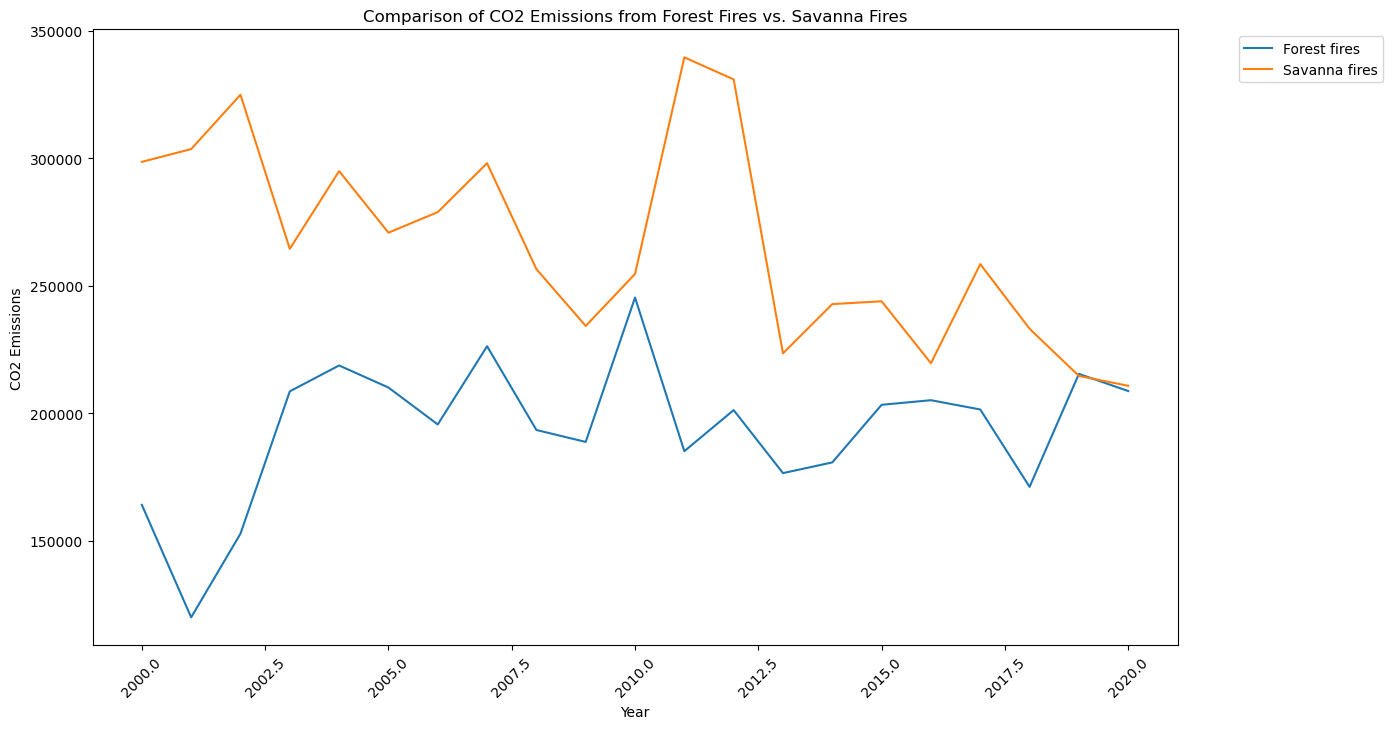

In [15]:
# Analysis of Trends in Forest and Savanna Fires Relative to CO2 Emissions
# Data Aggregation
df_fires_trend = df_2000_2020.groupby('Year').agg({'Forest fires': 'sum', 'Savanna fires': 'sum', 'total_emission': 'sum'}).reset_index()

# Structurer les données en une seule colonne pour les valeurs d'émissions de CO2 et une autre colonne indiquant le type d'incendie.
df_structure = pd.melt(df_fires_trend, id_vars='Year', value_vars=['Forest fires', 'Savanna fires'], 
                  var_name='fire_type', value_name='emissions')

# Creation of the graph comparing CO2 emissions from forest fires versus savanna fires
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_structure, x='Year', y='emissions', hue='fire_type')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.title('Comparison of CO2 Emissions from Forest Fires vs. Savanna Fires')

# Adjustment of the x-axis labels
plt.xticks(rotation=45)

# Relocation of the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

The graph shows the trends in CO2 emissions from forest and savanna fires over the years. It is clear that CO2 emissions related to forest and savanna fires vary significantly from year to year, reflecting the sporadic nature of fires and their dependence on a multitude of environmental and human factors. While the data does not directly show the impact on extreme climate events, it suggests that forest and savanna fires are significant sources of CO2 emissions, which may contribute to climate change and, consequently, influence the frequency and intensity of extreme weather events. These results indicate the need for more effective vegetation fire management to mitigate CO2 emissions and reduce their potential impact on the climate.

## Partie 2 : Analysis questions

### Question 2.1 : What is the impact of savanna and forest fires on CO2 emissions in the agro-food sector?

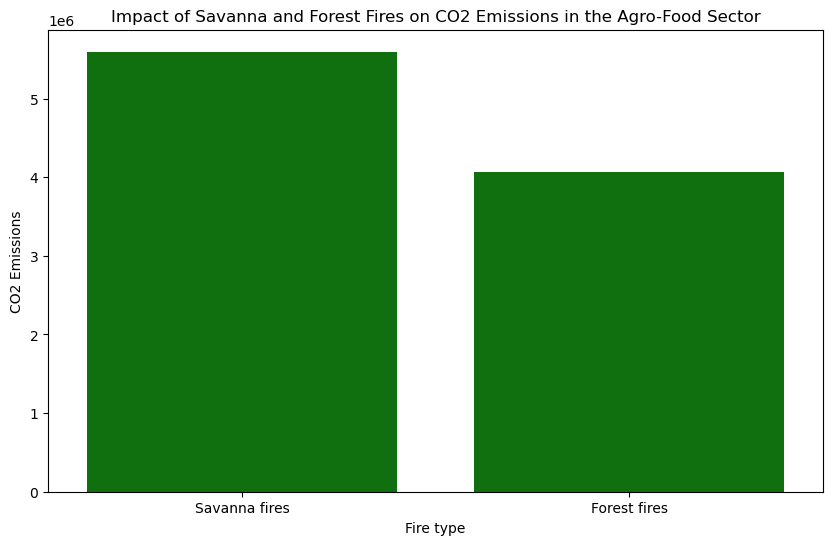

In [18]:
# Select the relevant columns for the analysis
selected_columns = ["Savanna fires", "Forest fires", "total_emission"]

# Remove rows with missing values in these columns
data_cleaned = df_2000_2020[selected_columns].dropna()

# Calculate the sum of CO2 emissions for savanna fires and forest fires
total_co2_by_fire_type = data_cleaned[selected_columns[:-1]].sum()

# Convert the series to a DataFrame for visualization
total_co2_df = total_co2_by_fire_type.reset_index()
total_co2_df.columns = ["Fire_type", "CO2 Emissions"]

# Create a visualization
plt.figure(figsize=(10, 6))
sns.barplot(x="Fire_type", y="CO2 Emissions", data=total_co2_df, color='green')
plt.title("Impact of Savanna and Forest Fires on CO2 Emissions in the Agro-Food Sector")
plt.xlabel("Fire type")
plt.ylabel("CO2 Emissions")
plt.show()

The graph indicates that savanna fires are responsible for a larger amount of CO2 emissions compared to forest fires within the agro-food sector. This suggests that savanna fires may play a more significant role in greenhouse gas emissions from the sector than forest fires, highlighting the importance of targeting fire prevention and management in savanna areas for CO2 mitigation strategies. This information is crucial for developing land management policies and practices that reduce fires in agricultural areas and thus contribute to combating climate change.

### Question 2.2 : Are CO2 emissions correlated with demographic factors (such as rural population) or climatic factors (such as temperature variations)?

In [19]:
# Selection of relevant columns
correlation_factors = ['total_emission', 'Rural population', 'Average Temperature °C']

# Filtrage du DataFrame pour ne garder que les colonnes d'intérêt
filtered_data = df_2000_2020[correlation_factors]

# Calcul des corrélations
correlation_matrix = filtered_data.corr()

# Voir la matrice de corrélation
correlation_matrix

,total_emission,Rural population,Average Temperature °C
total_emission,1.000000,0.681728,-0.011195
Rural population,0.681728,1.000000,-0.039506
Average Temperature °C,-0.011195,-0.039506,1.000000


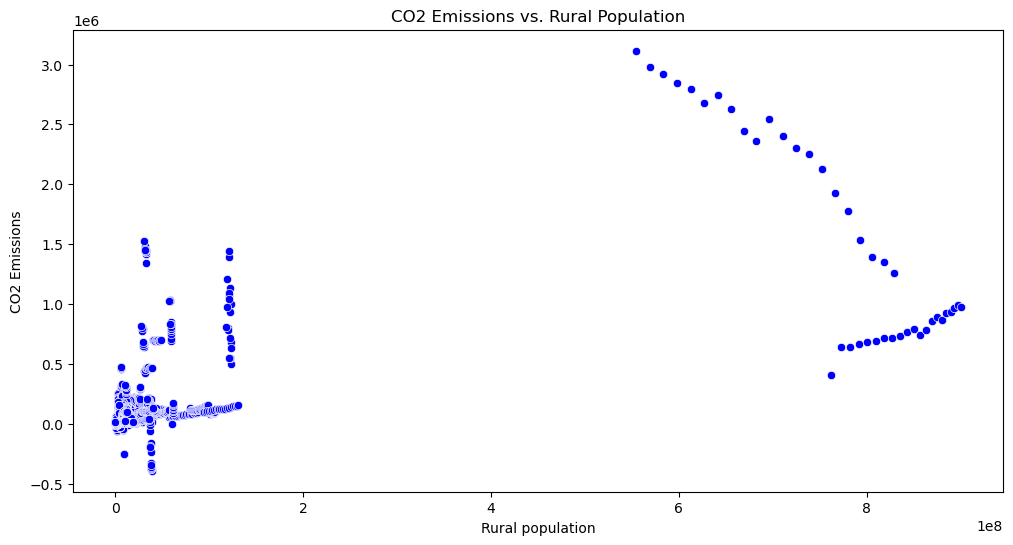

In [20]:

# Creation of Graphs for Factor Comparison and Correlation Analysis
# CO2 Emissions vs Rural Population
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Rural population', y='total_emission', data=filtered_data, color="blue", marker="o")
plt.title('CO2 Emissions vs. Rural Population')
plt.xlabel('Rural population')
plt.ylabel('CO2 Emissions')
plt.show()

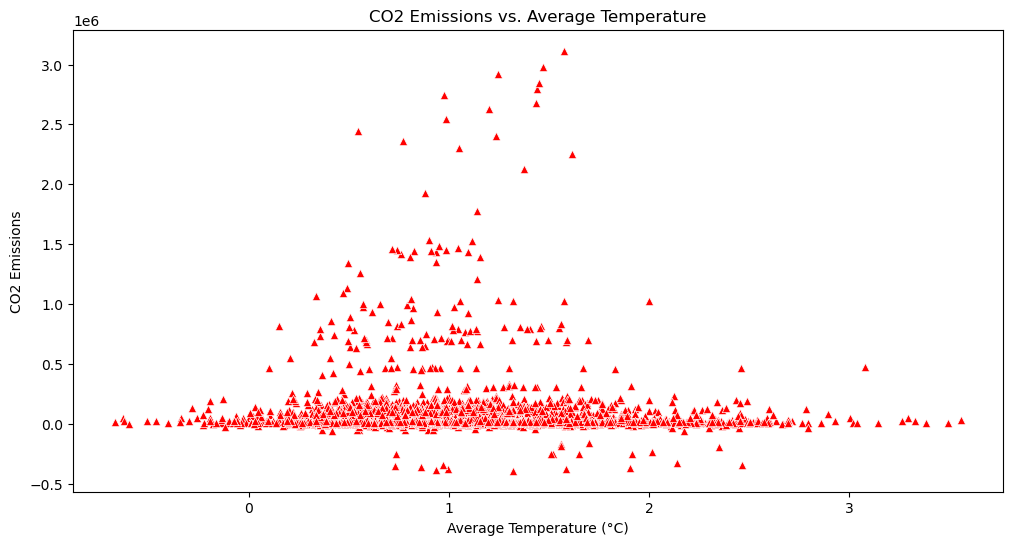

In [21]:
# CO2 Emissions vs. Average Temperature
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Average Temperature °C', y='total_emission', data=filtered_data, color="red", marker="^")
plt.title('CO2 Emissions vs. Average Temperature')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('CO2 Emissions')
plt.show()

The graphs suggest a non-linear relationship between CO2 emissions and the two variables studied: rural population and average temperature. In the first graph, the absence of a clear trend or pattern indicates that there is no direct and obvious relationship between the rural population and CO2 emissions. The second graph also shows a wide dispersion of data without a marked linear trend between average temperature and CO2 emissions. Together, these observations suggest that additional factors need to be considered to fully understand CO2 emissions, and that the relationship with demographic and climatic variables may be influenced by a variety of other environmental and economic factors.

### Question 2.3 : Is there a correlation between rural population growth and CO2 emissions related to food production over time?

c:\Users\Utilisateur 1\Documents\Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Utilisateur 1\Documents\Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Evolution of the Rural Population Over the Past 20 Years')

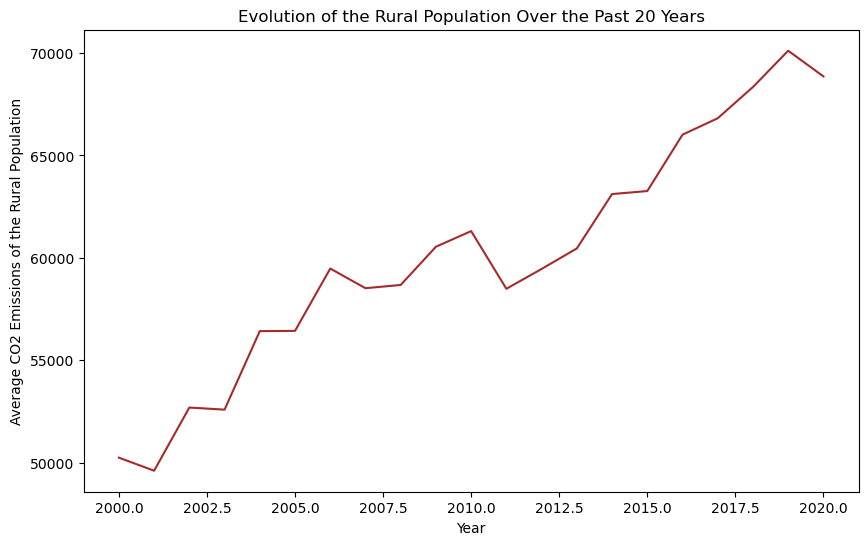

In [22]:
# Select the relevant columns for the analysis (year, rural population, and CO2 emissions)
selected_columns = ["Year", "Rural population", "total_emission"]

# Remove rows with missing values in these columns
data = df_2000_2020[selected_columns].dropna()

# Calculate the average rural population for each year
average_rural_population = data.groupby("Year")["total_emission"].mean().reset_index()

# Create a visualization of the evolution of the rural population over the past 20 years
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_rural_population, x="Year", y="total_emission", color='brown')
plt.xlabel("Year")
plt.ylabel("Average CO2 Emissions of the Rural Population")
plt.title("Evolution of the Rural Population Over the Past 20 Years")

The graph shows a general upward trend in average CO2 emissions related to the rural population over the past two decades. This indicates that, despite increasing awareness and efforts to reduce emissions, rural activities related to food production have contributed to a rise in CO2 emissions. This upward trend could reflect various factors, such as increased agricultural production to meet the demands of a growing global population and continued reliance on less efficient and more carbon-intensive production methods. These observations suggest the need to accelerate the development and adoption of more sustainable agricultural practices to reverse this trend.

### Question 2.4 : How have CO2 emissions related to rice cultivation evolved on average over the past two decades?

c:\Users\Utilisateur 1\Documents\Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Utilisateur 1\Documents\Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


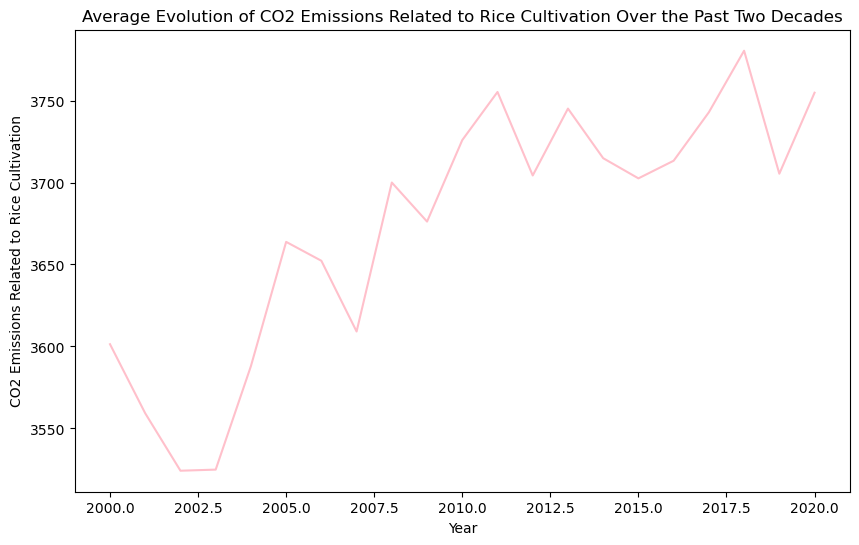

In [23]:
# Select the relevant columns for the analysis (year and CO2 emissions related to rice cultivation)
selected_columns = ["Year", "Rice Cultivation"]

# Remove rows with missing values in these columns
data = df_2000_2020[selected_columns].dropna()

# Calculate the average CO2 emissions related to rice cultivation for each year
average_rice_co2_emissions = data.groupby("Year")["Rice Cultivation"].mean().reset_index()

# Create a visualization of the evolution of CO2 emissions related to rice cultivation over the past two decades
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_rice_co2_emissions, x="Year", y="Rice Cultivation",color='pink')
plt.xlabel("Year")
plt.ylabel("CO2 Emissions Related to Rice Cultivation")
plt.title("Average Evolution of CO2 Emissions Related to Rice Cultivation Over the Past Two Decades")
plt.show()

The graph indicates a general fluctuation in CO2 emissions attributable to rice cultivation over the past two decades, with an overall upward trend. Although there are occasional decreases, the trend is increasing, suggesting that rice cultivation has become more CO2-intensive or that its production has risen. This could reflect intensified agricultural practices or an expansion in rice cultivation to meet growing demand, highlighting the need for more sustainable and less carbon-intensive rice farming practices to mitigate their impact on climate change.

### Question 2.5 : Which are the 20 countries with the highest contribution of drained organic soils to agricultural CO2 emissions?

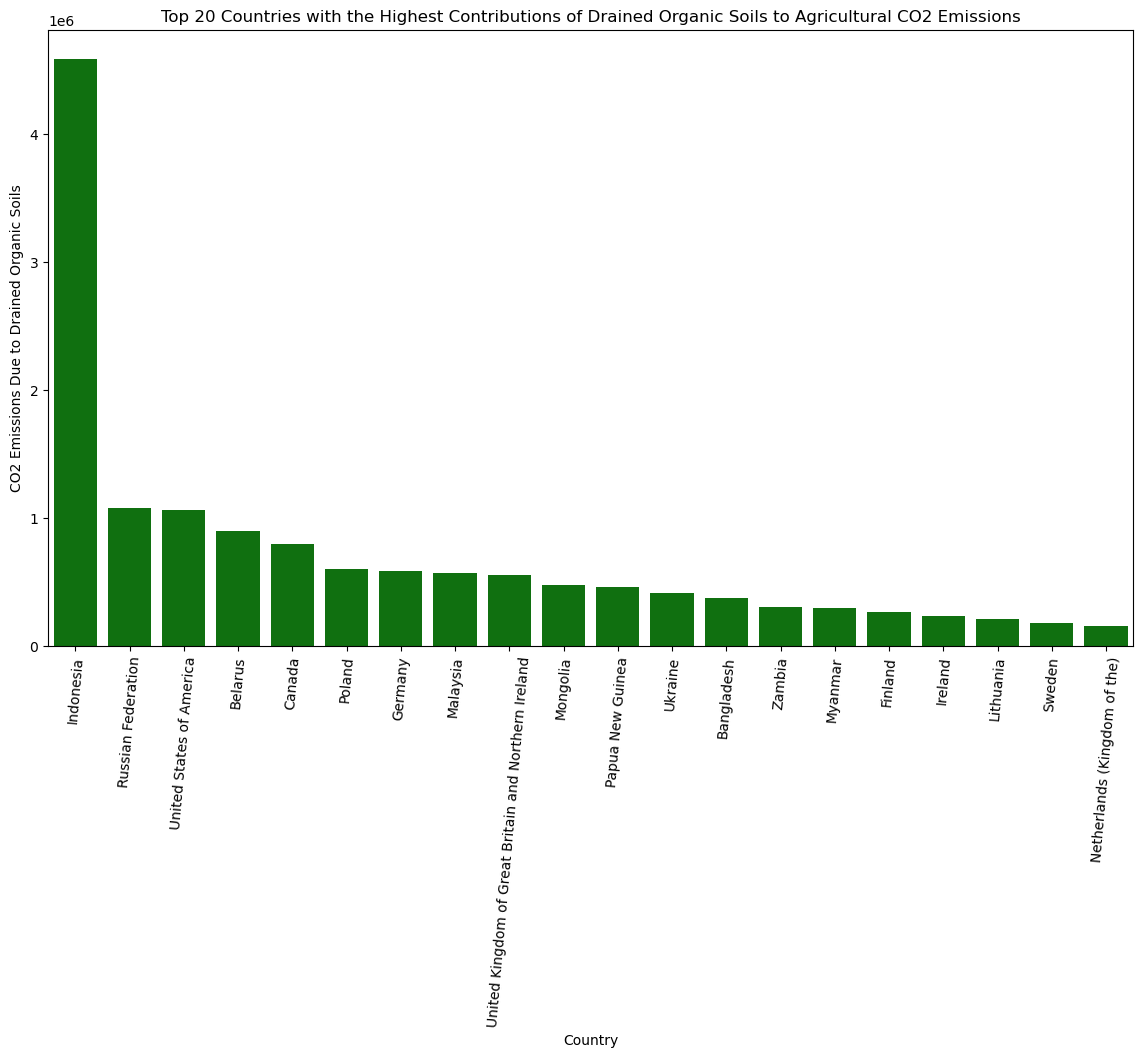

In [25]:
# Group the data by country and calculate the total CO2 emissions due to drained organic soils.
grouped_data = df_2000_2020.groupby("Area")["Drained organic soils (CO2)"].sum()

# Select the top 20 countries with the highest contributions
top_20_countries = grouped_data.nlargest(20)

# Transform 'top_20_countries' into a DataFrame
top_20_countries_df = top_20_countries.reset_index()
top_20_countries_df.columns = ["Area", "Drained organic soils (CO2)"]

# Create the graph
plt.figure(figsize=(14, 8))
sns.barplot(y="Drained organic soils (CO2)", x="Area", data=top_20_countries_df,color='green')
plt.title("Top 20 Countries with the Highest Contributions of Drained Organic Soils to Agricultural CO2 Emissions")
plt.xlabel("Country")
plt.ylabel("CO2 Emissions Due to Drained Organic Soils")

# Adjust the x-axis for better readability
plt.xticks(rotation=85)
plt.show()

The graph clearly shows that Indonesia, the Russian Federation, and the United States are the top three contributors to agricultural CO2 emissions due to drained organic soils. These results highlight the significant impact of soil management practices on overall greenhouse gas emissions. They also suggest potential targets for emission reduction initiatives, indicating that improvements in the management of drained organic soils in these countries could have a considerable impact on global agricultural CO2 emissions.

### Question 2.6 : What are the main factors contributing to CO2 emissions in the agrifood sector in 2020?

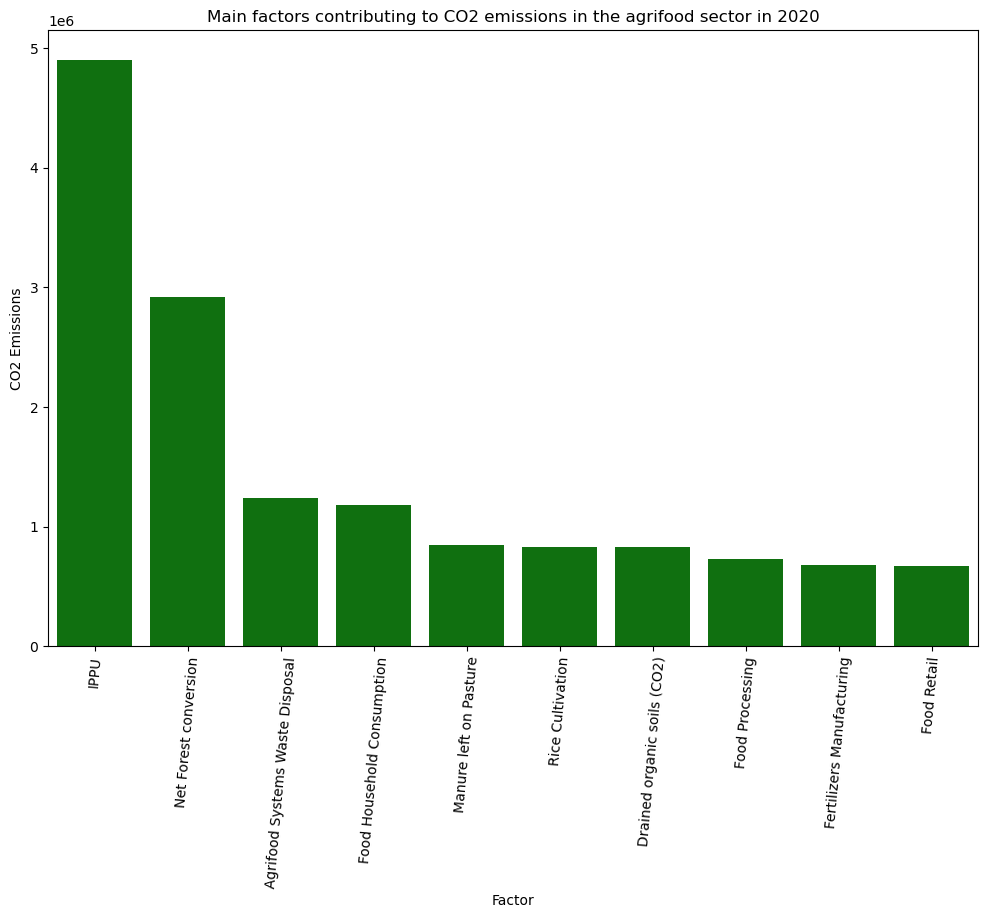

In [27]:
# Filter the data for the year 2020
data_2020 = df_2000_2020[df_2000_2020['Year'] == 2020]

# Select the relevant columns for analyzing CO2 factors
selected_columns = ['Savanna fires', 'Forest fires', 'Crop Residues', 'Rice Cultivation',
                    'Drained organic soils (CO2)', 'Pesticides Manufacturing', 'Food Transport',
                    'Forestland', 'Net Forest conversion', 'Food Household Consumption',
                    'Food Retail', 'On-farm Electricity Use', 'Food Packaging', 'Agrifood Systems Waste Disposal',
                    'Food Processing', 'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
                    'Manure left on Pasture', 'Manure Management', 'Fires in organic soils', 
                    'Fires in humid tropical forests', 'On-farm energy use']

# Calculate the total CO2 emissions for each factor in 2020
total_emissions_2020 = data_2020[selected_columns].sum()

# Sort the factors in descending order of CO2 emissions
sorted_factors = total_emissions_2020.sort_values(ascending=False)

# Select the top 10 factors with the highest CO2 emissions
top_10_factors = sorted_factors.head(10)

# Convert the results to a DataFrame for visualization
top_10_factors_df = top_10_factors.reset_index()
top_10_factors_df.columns = ['Factor', 'CO2 Emissions']

# Create a visualization to show the main factors contributing to CO2 emissions in 2020
plt.figure(figsize=(12, 8))
sns.barplot(y='CO2 Emissions', x='Factor', data=top_10_factors_df, color='green')
plt.title("Main factors contributing to CO2 emissions in the agrifood sector in 2020")
plt.ylabel("CO2 Emissions")
plt.xlabel("Factor")

# Adjust the x-axis for better readability of the chart
plt.xticks(rotation=85)
plt.show()

The chart highlights the major factors contributing to CO2 emissions in the agri-food sector in 2020, showing that industrial and productive processes (IPPU) are the largest contributors, closely followed by deforestation and household food consumption. The management of food system waste and rice cultivation are also significant sources of emissions. These results underscore the importance of focusing on reducing emissions through cleaner production methods, sustainable land management practices, and more effective waste management to mitigate the environmental impact of the agri-food sector.

### Question 2.7 : What is the share of CO2 emissions attributed to crop residues compared to other sources in different countries?

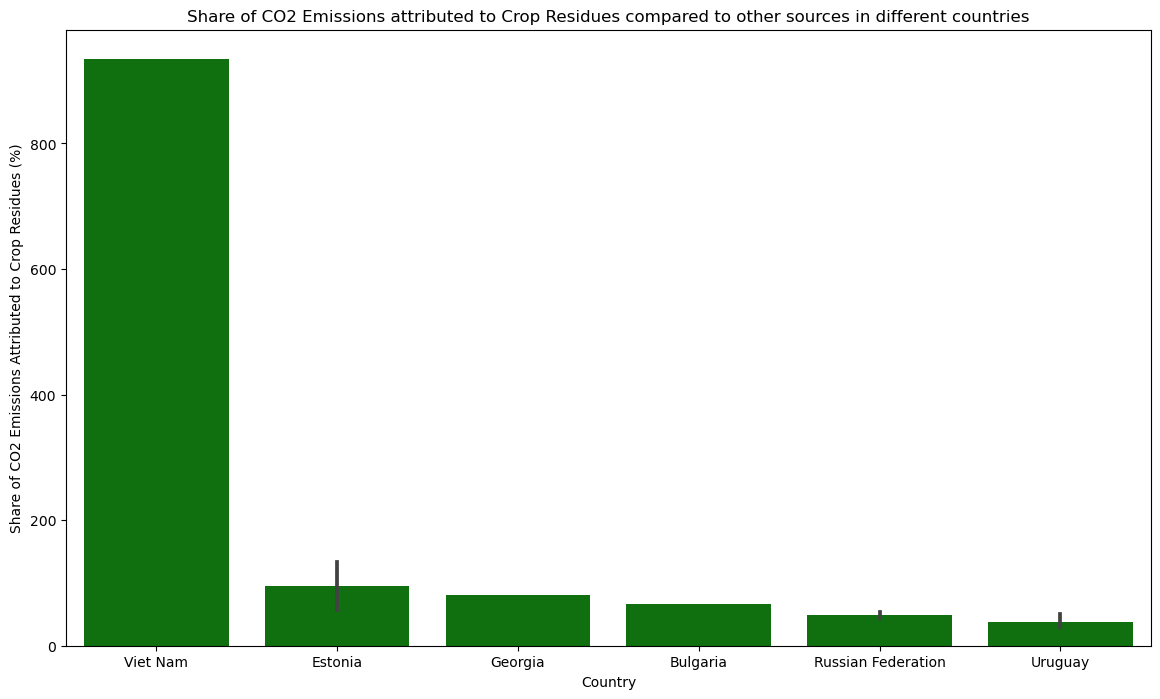

In [29]:
# Selecting the Relevant Columns for Analysis
selected_columns = ['Area', 'Crop Residues', 'total_emission']

# Remove rows with missing values in these columns
data_cleaned = df_2000_2020[selected_columns].dropna()

# Calculate the proportion of CO2 emissions attributed to crop residues relative to total emissions for each country
data_cleaned['Crop Residues Share'] = (data_cleaned['Crop Residues'] / data_cleaned['total_emission']) * 100

# Sort the data in descending order of the proportion of emissions attributed to crop residues
sorted_data = data_cleaned.sort_values(by='Crop Residues Share', ascending=False)

# Select the top 10 countries with the highest proportion
top_10_countries = sorted_data.head(10)

# Reverse the order of the data for visualization (not necessary if simply selecting the top 10 in descending order)
# top_10_countries = top_10_countries.iloc[::-1]

# Create a visualization to show the share of CO2 emissions attributed to crop residues compared to other sources in different countries
plt.figure(figsize=(14, 8))
sns.barplot(x='Area', y='Crop Residues Share', data=top_10_countries, color='green')
plt.title("Share of CO2 Emissions attributed to Crop Residues compared to other sources in different countries")
plt.ylabel("Share of CO2 Emissions Attributed to Crop Residues (%)")
plt.xlabel("Country")
plt.show()

The chart illustrates the relative share of CO2 emissions attributed to crop residues compared to other emission sources in different countries. Vietnam stands out with an exceptionally high proportion, indicating that crop residues are a significant source of its agricultural emissions. This may be due to suboptimal crop residue management practices for CO2 emission reduction. The other countries shown, while having a lower share, still demonstrate that crop residues are a noteworthy emission source. For these countries, there is potential for improvement in crop residue management to reduce their overall CO2 emissions impact.

### Question 2.8 : World map showing total CO2 emissions by country over the past 20 years

### Note
#### Non-Plagiarism Statement

This last question was addressed with the assistance of Chat GPT 4 to guide us in visualizing a world map. The geopandas library was used here to help construct the code.

This question and its visualization was important for me given the global scope of the research topic. It was evident that displaying the total CO2 emissions by country through this world map would allow to more easily grasp the disparities in CO2 emissions across the globe.

In [30]:
pip install geopandas matplotlib

   ---------------------------------------- 0.0/323.6 kB ? eta -:--:--
   --- ------------------------------------ 30.7/323.6 kB 1.4 MB/s eta 0:00:01
   ------------- -------------------------- 112.6/323.6 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 323.6/323.6 kB 2.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/15.9 MB ? eta -:--:--
   - -------------------------------------- 0.7/15.9 MB 14.6 MB/s eta 0:00:02
   --- ------------------------------------ 1.3/15.9 MB 13.8 MB/s eta 0:00:02
   --- ------------------------------------ 1.4/15.9 MB 14.5 MB/s eta 0:00:02
   --- ------------------------------------ 1.4/15.9 MB 14.5 MB/s eta 0:00:02
   --- ------------------------------------ 1.4/15.9 MB 14.5 MB/s eta 0:00:02
   ------ --------------------------------- 2.5/15.9 MB 9.5 MB/s eta 0:00:02
   ---------- ----------------------------- 4.3/15.9 MB 13.8 MB/s eta 0:00:01
   ----------- ---------------------------- 4.5/15.9 MB 13.7 MB/s eta 0:00:

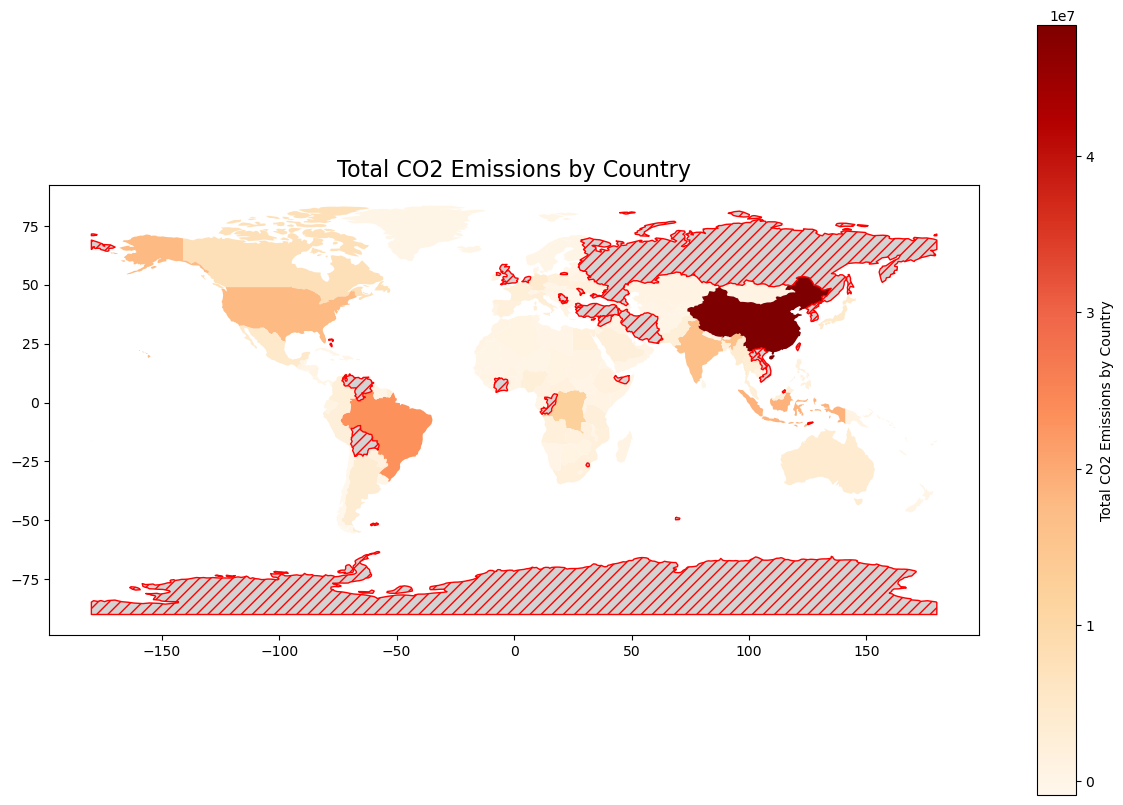

In [55]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the geographic dataset of countries.
world = gpd.read_file('ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

# Group the data by country and calculate the total emissions.
total_co2_by_country = df_2000_2020.groupby('Area')['total_emission'].sum().reset_index()

# Merge the emissions data with the geographic data.
merged = world.set_index('ADMIN').join(total_co2_by_country.set_index('Area'))

# Plot the map using the total CO2 emissions to color the countries.
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='total_emission', ax=ax, legend=True,
            legend_kwds={'label': "Total CO2 Emissions by Country"},
            cmap='OrRd', missing_kwds={
                "color": "lightgrey",
                "edgecolor": "red",
                "hatch": "///",
                "label": "Missing data"
            })

# Set the title in the middle of the plot
ax.set_title("Total CO2 Emissions by Country", fontsize=16, loc='center')

# Display the map
plt.show()


This map was intended to visualize the disparities in CO2 emissions by country around the world. After creating the map, we can see some countries marked with hatching, indicating missing information in the data. Russia, for example, is among these hatched countries, yet it appears among the top 20 countries with the highest contributions from drained organic soils to agricultural CO2 emissions. Thus, making the connection, we can see that despite the lack of data, this country is among the most polluting and would likely be even more so than what our previous graphs have shown.

Ultimately, this map also highlights a limitation of our study. Despite addressing pertinent analytical questions and creating various visualizations, the accuracy and depth of our results depend on the amount of data available for different countries around the world.

# Analysis Conclusion : Key learnings of the analysis

The period from 2000 to 2020 has seen a significant increase in CO2 emissions, with notable growth in both total emissions and those related to agricultural activities. This underscores a concerning trend for global climate (Questions 1.1 and 1.2). The examination of emission sources revealed that forest fires and energy use in agriculture are significant contributors, indicating areas where sustainability efforts could be particularly effective (Question 1.2). Geographically, China and the United States are leading contributors to agricultural CO2 emissions, highlighting potential targets for emission reduction initiatives (Question 1.3). However, attempts to directly correlate CO2 emissions with average temperature variations did not show a clear linear relationship (Question 1.4), and the impacts of emissions on extreme climate phenomena, such as fires, remain complex and require further study (Question 1.5). These results emphasize the need for global strategies to mitigate climate change while also focusing on specific actions within the agricultural sector to reduce carbon footprints.


Over the past two decades, CO2 emissions in the agro-food sector have shown distinct trends worldwide. Data analysis revealed that emissions attributable to agricultural activities and practices such as rice cultivation and drained organic soil management have significantly contributed to the global carbon footprint (Questions 2.4 and 2.5). Countries such as Indonesia, Russia, and the United States have been identified as major contributors, highlighting the need for targeted actions in these regions (Question 2.5). Despite a decrease in the global rural population, the average CO2 emissions per capita in these areas have increased (Question 2.3), indicating growing challenges in sustainable agricultural practices. Rice cultivation, in particular, has shown variations in CO2 emissions, suggesting the impact of agricultural intensification and residue management methods. The global mapping of CO2 emissions highlighted geographic inequalities, with significant implications for environmental policies and sustainable development (Question 2.8). Together, these conclusions call for strategic reflection on how modern agriculture can adapt and mitigate to address the challenges of climate change.